In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from wrangle import wrangle_zillow
from wrangle import train_validate_test_split
from wrangle import scale_data

import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  wrangle_zillow() # wrangling and cleaning data

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips,garagecarcnt,yearbuilt,poolcnt,lotsizesquarefeet
0,3,2.0,1178,136173,6037,0.0,1948,0.0,7527.0
1,3,2.0,1404,341724,6037,0.0,1939,0.0,8685.0
2,2,1.0,1313,206438,6037,0.0,1945,0.0,6749.0
4,3,1.0,1387,94844,6037,0.0,1954,0.0,9332.0
5,2,1.0,1125,339111,6037,0.0,1980,0.0,5338.0


In [4]:
train, validate, test = train_validate_test_split(df) # splitting the data for modeling

In [5]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips,garagecarcnt,yearbuilt,poolcnt,lotsizesquarefeet
6902,3,2.0,1189,450000,6059,2.0,1959,0.0,6600.0
11,3,2.0,1428,196834,6037,0.0,1937,0.0,7500.0
24972,3,1.0,1472,145689,6037,0.0,1925,0.0,5512.0
46550,3,1.0,1296,255815,6037,0.0,1905,0.0,5534.0
30474,3,2.5,2551,203173,6059,2.0,1970,0.0,9600.0


In [8]:
#scaling the split data for modeling
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, ['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'yearbuilt', 'poolcnt', 'lotsizesquarefeet'])

In [9]:
train_scaled.columns # looking at columns after creating scaled columns and concatenating

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'fips', 'garagecarcnt', 'yearbuilt', 'poolcnt',
       'lotsizesquarefeet', 'bedroomcnt_scaled', 'bathroomcnt_scaled',
       'taxvaluedollarcnt_scaled', 'calculatedfinishedsquarefeet_scaled',
       'garagecarcnt_scaled', 'yearbuilt_scaled', 'poolcnt_scaled',
       'lotsizesquarefeet_scaled'],
      dtype='object')

In [10]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips,garagecarcnt,yearbuilt,poolcnt,lotsizesquarefeet,bedroomcnt_scaled,bathroomcnt_scaled,taxvaluedollarcnt_scaled,calculatedfinishedsquarefeet_scaled,garagecarcnt_scaled,yearbuilt_scaled,poolcnt_scaled,lotsizesquarefeet_scaled
6902,3,2.0,1189,450000,6059,2.0,1959,0.0,6600.0,0.333333,0.285714,0.422950,0.234136,0.4,0.633987,0.0,0.452383
11,3,2.0,1428,196834,6037,0.0,1937,0.0,7500.0,0.333333,0.285714,0.179726,0.308847,0.0,0.490196,0.0,0.529116
24972,3,1.0,1472,145689,6037,0.0,1925,0.0,5512.0,0.333333,0.000000,0.130589,0.322601,0.0,0.411765,0.0,0.359621
46550,3,1.0,1296,255815,6037,0.0,1905,0.0,5534.0,0.333333,0.000000,0.236391,0.267584,0.0,0.281046,0.0,0.361497
30474,3,2.5,2551,203173,6059,2.0,1970,0.0,9600.0,0.333333,0.428571,0.185816,0.659894,0.4,0.705882,0.0,0.708159


In [13]:
X_train_original = train[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'fips']] # Unscaled features
X_train = train_scaled[['bedroomcnt_scaled', 'bathroomcnt_scaled', 'calculatedfinishedsquarefeet_scaled']] # scaled features
y_train = train['taxvaluedollarcnt'] # Unscaled, target variable only

X_validate = validate_scaled[['bedroomcnt_scaled', 'bathroomcnt_scaled', 'calculatedfinishedsquarefeet_scaled']] # scaled features
y_validate= validate['taxvaluedollarcnt'] # Unscaled, target variable only

X_test= test_scaled[['bedroomcnt_scaled', 'bathroomcnt_scaled', 'calculatedfinishedsquarefeet_scaled']] # scaled features
y_test = test['taxvaluedollarcnt'] # Unscaled, target variable only

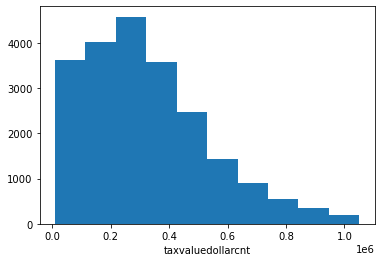

In [14]:
# plotting the y_train data to visualize the target variable

plt.hist(y_train)
plt.xlabel('taxvaluedollarcnt')
plt.ylabel('')
plt.show()

In [15]:
train.head() 

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips,garagecarcnt,yearbuilt,poolcnt,lotsizesquarefeet
6902,3,2.0,1189,450000,6059,2.0,1959,0.0,6600.0
11,3,2.0,1428,196834,6037,0.0,1937,0.0,7500.0
24972,3,1.0,1472,145689,6037,0.0,1925,0.0,5512.0
46550,3,1.0,1296,255815,6037,0.0,1905,0.0,5534.0
30474,3,2.5,2551,203173,6059,2.0,1970,0.0,9600.0


In [26]:
# Make these dataframes to allow for baselines to be appended
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# Predict mean
value_pred_mean = y_train['taxvaluedollarcnt'].mean()
y_train['value_pred_mean'] = value_pred_mean
y_validate['value_pred_mean'] = value_pred_mean


# Predict median
value_pred_median = y_train['taxvaluedollarcnt'].median()
y_train['value_pred_median'] = value_pred_median
y_validate['value_pred_median'] = value_pred_median

In [18]:
y_train.head()

,taxvaluedollarcnt,value_pred_mean,value_pred_median
6902,450000,324769.866061,287502.0
11,196834,324769.866061,287502.0
24972,145689,324769.866061,287502.0
46550,255815,324769.866061,287502.0
30474,203173,324769.866061,287502.0


In [27]:
  # RMSE mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.value_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.value_pred_median)**(1/2)


RMSE using Mean
Train/In-Sample:  209251.33 
Validate/Out-of-Sample:  209215.09


In [30]:
 # LinearRegression (OLS)
 
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  186925.21136880686 
Validation/Out-of-Sample:  185924.04932940134


In [31]:
# Lasso lars

# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  186925.5417888989 
Validation/Out-of-Sample:  185923.6925020168


In [32]:
# Tweedie regressor

# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  186937.6892502257 
Validation/Out-of-Sample:  185972.67186178494


In [33]:
# polynomial features

# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [35]:
# polynomial linear regression

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  186680.4451827671 
Validation/Out-of-Sample:  185687.8347213057


Model selection

In [25]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['taxvaluedollarcnt_pred_lm'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxvaluedollarcnt, y_test.taxvaluedollarcnt_pred_lm)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  184616.0160493814
